## Tech SaaS Sales Prediction

This is case study about TechnoServe, a fictional tech SaaS (Software as a service) startup that specialises in different types of cloud-based software services to the small and medium enterprise customers. The products provided by the company are inclined towards increasing the productivity for the customers.

The revenue that the company generates is highly dependent on the consumption of the cloud services that they provide. Therefore, the revenue in-flow in the company is highly dependent on the number of clients that the company has. The company is facing a very pertinent problem faced in the IT industry today, declining conversions across its sales funnel.

The problem that the company is facing is that its pipeline conversion percentage has dropped from 35% at the end of the last fiscal (FY 2019-20) to 25% at present. The company needs a solution to solve the issue.


* Data fields description
* Opportunity ID	 : Unique ID
* Technology\nPrimary	: Tech services offerered by the company
* City  : City where the client is based
* B2B Sales Medium	: Medium used for converting the customers
* Sales Velocity	: Speed at which the sales oppurtunity moves theough the funnel
* Opportunity Status	: Won the client or lost
* Sales Stage Iterations	: The number of stages it takes for clients to convert
* Opportunity Size (USD)	: Value of the service 
* Client Revenue Sizing	: Revenue if sold to the client based on their requirement 
* Client Employee Sizing	: Number of employees in the client company
* Business from Client Last Year	: Previous year's revenue 
* Compete Intel	Information about competitors and the competitive environment to support decision-making and strategic planning
* Opportunity Sizing: Potential value or revenue associated with a particular business opportunity



## Importing the necessary libraries

In [120]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [121]:
#Read the CSV file
df = pd.read_csv('Sales_Pipeline.csv')

Sales Velocity = Number of Opportunities × Average Deal Size× Sales Stage Iterations

In [122]:
#Checking the first 5 rows of the data
df.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [123]:
#Set index and check for integrity/ Duplicates
df.set_index("Opportunity ID", verify_integrity=True).keys()

Index(['Technology\nPrimary', 'City', 'B2B Sales Medium', 'Sales Velocity',
       'Opportunity Status', 'Sales Stage Iterations',
       'Opportunity Size (USD)', 'Client Revenue Sizing',
       'Client Employee Sizing', 'Business from Client Last Year',
       'Compete Intel', 'Opportunity Sizing'],
      dtype='object')

In [124]:
#checking the datatypes of each column
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Opportunity ID                  78025 non-null  object
 1   Technology
Primary              78025 non-null  object
 2   City                            78025 non-null  object
 3   B2B Sales Medium                78025 non-null  object
 4   Sales Velocity                  78025 non-null  int64 
 5   Opportunity Status              78025 non-null  object
 6   Sales Stage Iterations          78025 non-null  int64 
 7   Opportunity Size (USD)          78025 non-null  int64 
 8   Client Revenue Sizing           78025 non-null  object
 9   Client Employee Sizing          78025 non-null  object
 10  Business from Client Last Year  78025 non-null  object
 11  Compete Intel                   68768 non-null  object
 12  Opportunity Sizing              78025 non-null

In [125]:
#checking the statistical summary of the data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales Velocity,78025.0,43.595348,26.585600,0.0,19.0,43.0,65.0,210.0
Sales Stage Iterations,78025.0,2.955732,1.497242,1.0,2.0,3.0,3.0,23.0
Opportunity Size (USD),78025.0,30085.664992,21169.932617,0.0,13816.0,29845.0,43185.0,149981.0


In [126]:
#checking the number of rows and columns
df.shape


(78025, 13)

In [127]:
#Checking for null values
df.isna().sum()

Opportunity ID                       0
Technology\nPrimary                  0
City                                 0
B2B Sales Medium                     0
Sales Velocity                       0
Opportunity Status                   0
Sales Stage Iterations               0
Opportunity Size (USD)               0
Client Revenue Sizing                0
Client Employee Sizing               0
Business from Client Last Year       0
Compete Intel                     9257
Opportunity Sizing                   0
dtype: int64

In [128]:
df['Business_from_Client_Last_Year_codes'] = pd.Categorical(df["Business from Client Last Year"], ordered=True, categories=["0 (No business)", "25,000 - 50,000", "50,000 - 100,000", "More than 100,000"])

In [129]:
df['Client_revenue_sizing_codes'] = pd.Categorical(df["Client Revenue Sizing"], ordered=True, categories=["100K or less", "100K to 250K", "250K to 500K", "500K to 1M", "More than 1M"])

In [130]:
df["Client_Employee_Sizing_codes"] = pd.Categorical(df["Client Employee Sizing"], ordered=True, categories=["1K or less", "1K to 5K", "5K to 15K", "15K to 25K", "More than 25K"]).codes

In [131]:
df["Opportunity_Sizing_codes"] = pd.Categorical(df["Opportunity Sizing"], ordered=True, categories=["10K or less", "10K to 20K", "20K to 30K", "30K to 40K", "40K to 50K", "50K to 60K", "More than 60k"]).codes


### Changing datatype 

In [132]:
df['Opportunity Status'] = df['Opportunity Status'].replace({'Won': 1, 'Loss': 0})

# Exploratory Data Analysis

### Correlation Matrix

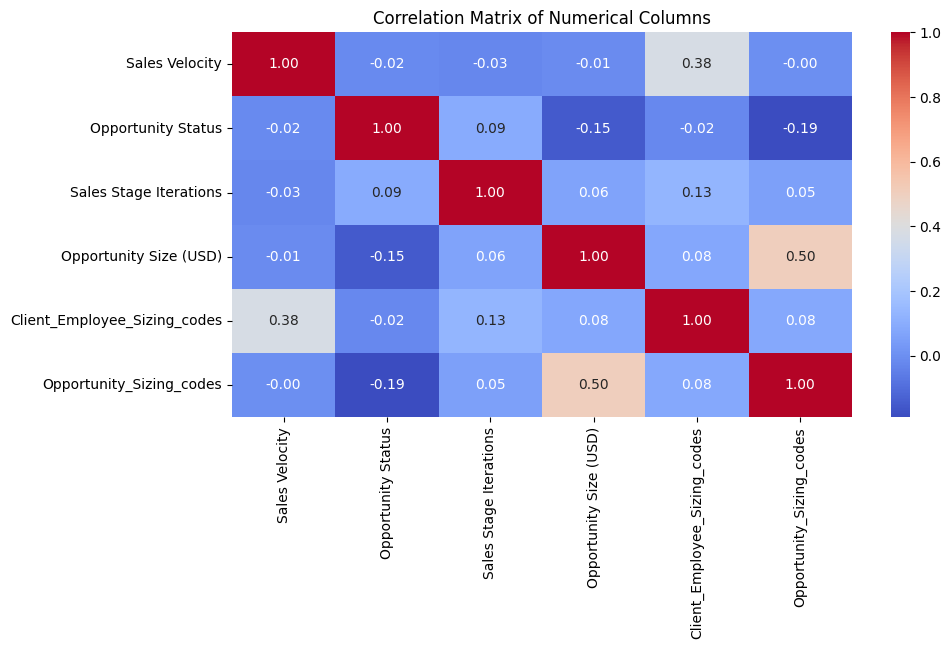

In [133]:
# Selecting only the numerical columns
numerical_df = df.select_dtypes(include='number')

# Calculating the correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


#### Insights from Correlation Matrix
* Sales velocity, sales stage iterations, opportunity size and compete intel have a postive correlation with Client Employee sizing, this might mean the bigger companies move faster through the sales funnel and take less time in decision making
* They also have a higher oppurtunity size, we can also assume these might be well established companies so we might know about the competitors in this domain. 
* Since the sales stage iterations are also higher which could mean, they move systematically and understand each and every thing before making an informed decision

### Compete Intel

In [134]:
#Checking the count for each sub category in Compete Intel
df['Compete Intel'].value_counts()

Compete Intel
Unknown    56724
Known      12044
Name: count, dtype: int64

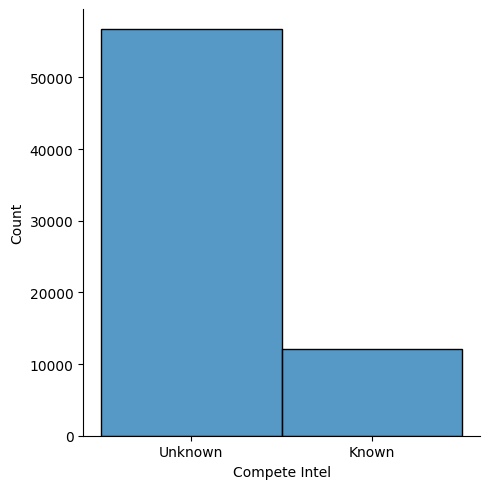

In [135]:
#Visualise the column Compete Intel 
sns.displot(data =df, x ='Compete Intel');

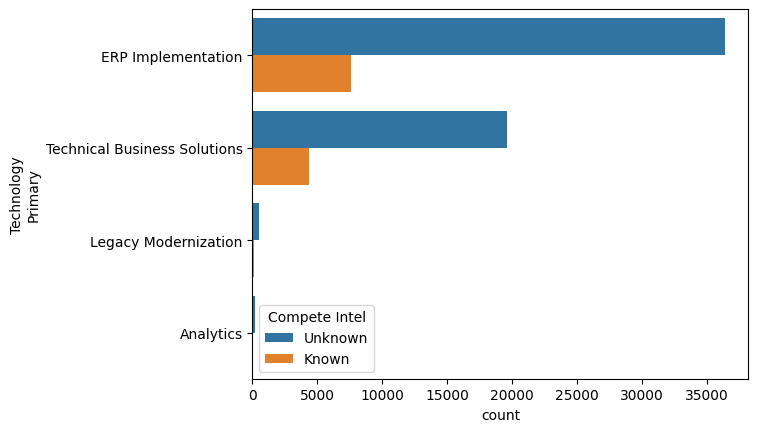

In [136]:
sns.countplot(data =df, y = 'Technology\nPrimary', hue ='Compete Intel');

### Impute missing values using Mode

In [137]:
# imputation for the Compete Intel using mode which is unknown column 
mode_value = df['Compete Intel'].mode()[0]  # Calculate the mode
df['Compete Intel'].fillna(mode_value, inplace=True) 

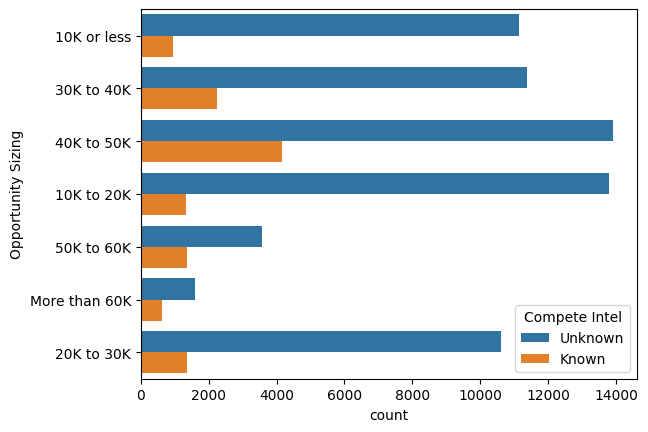

In [138]:
sns.countplot(data =df, y = 'Opportunity Sizing', hue ='Compete Intel');

#### Insights from Compete Intel
* Compute intel is known for ERP Implementation and Technical Business Solutions.
* Analytics and Legacy modernization are not well known, could be because each company has its own specific systems in place and could be unique whereas ERP is quite similar across a lot of companies, which could be said about Technical Business Solutions. 

#### Technologies - Primary

In [139]:
#Opputunities per city 
total_opportunity_size = df['Opportunity Size (USD)'].sum()
percentages = ((df.groupby('Technology\nPrimary')['Opportunity Size (USD)'].sum() / total_opportunity_size) * 100).round(2)
print(percentages)

Technology\nPrimary
Analytics                        0.33
ERP Implementation              61.76
Legacy Modernization             0.94
Technical Business Solutions    36.97
Name: Opportunity Size (USD), dtype: float64


In [140]:
df['Technology\nPrimary'].value_counts()

Technology\nPrimary
ERP Implementation              49810
Technical Business Solutions    27325
Legacy Modernization              609
Analytics                         281
Name: count, dtype: int64

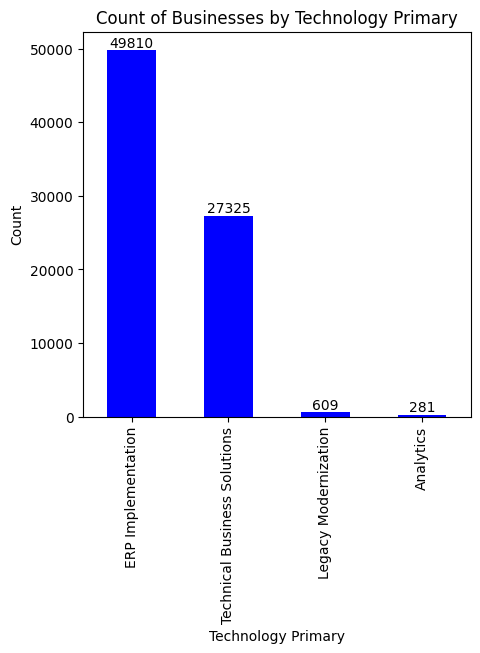

In [141]:
# Calculate count of businesses
count_of_business = df['Technology\nPrimary'].value_counts()

# Plot
plt.figure(figsize=(5,5))
ax = count_of_business.plot(kind='bar', color='blue')
plt.title('Count of Businesses by Technology Primary')
plt.xlabel('Technology Primary')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


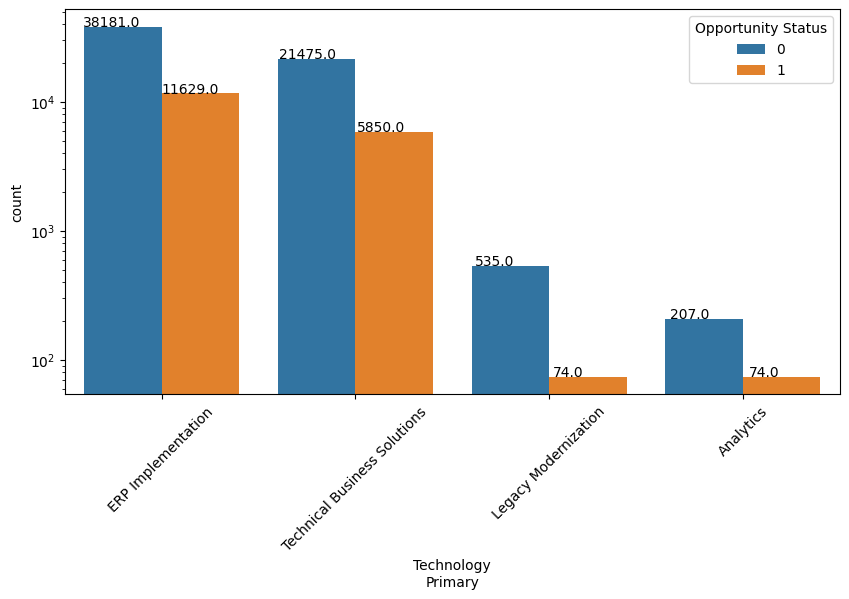

In [142]:
plt.figure(figsize = (10, 5))
ax= sns.countplot(x = "Technology\nPrimary", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 45)
ax.set_yscale('log')
plt.show()

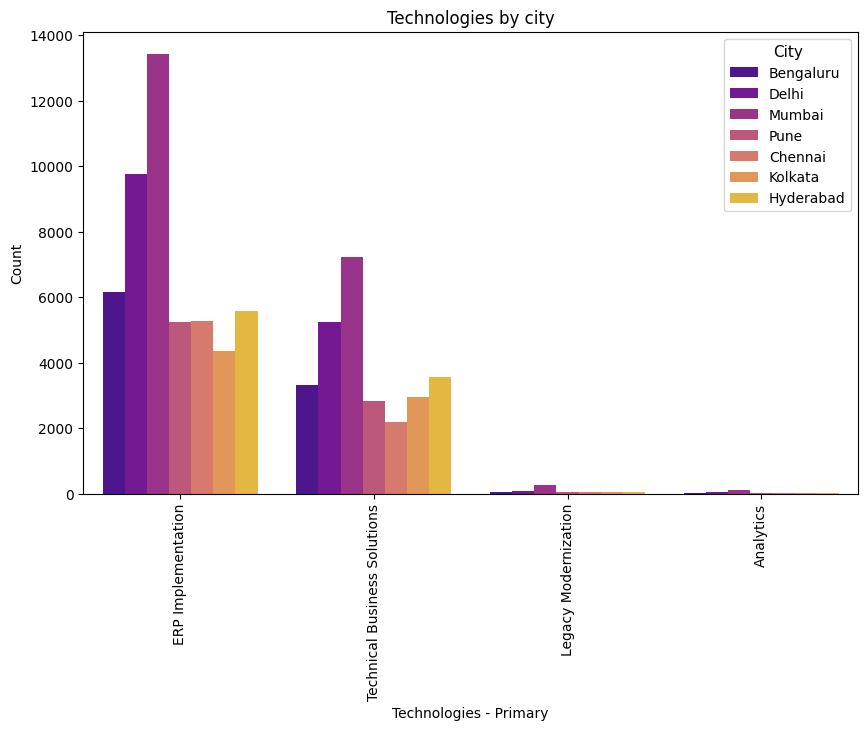

In [143]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Technology\nPrimary', hue='City', palette='plasma')
plt.title('Technologies by city')
plt.xlabel('Technologies - Primary')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='City', title_fontsize='11', loc='upper right')
plt.show()


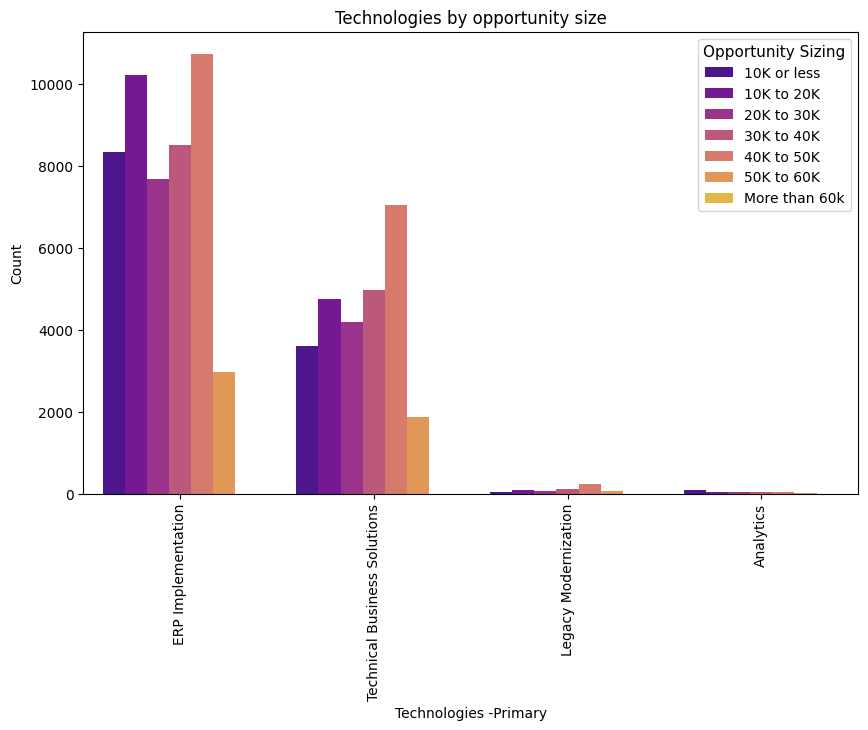

In [144]:
# Define the order of opportunity sizing categories
opportunity_order = ["10K or less", "10K to 20K", "20K to 30K", "30K to 40K", "40K to 50K", "50K to 60K", "More than 60k"]

# Create the count plot with specified order
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Technology\nPrimary', hue='Opportunity Sizing', palette='plasma', order=df['Technology\nPrimary'].unique(), hue_order=opportunity_order)

plt.title('Technologies by opportunity size')
plt.xlabel('Technologies -Primary')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Opportunity Sizing', title_fontsize='11', loc='upper right')
plt.show()


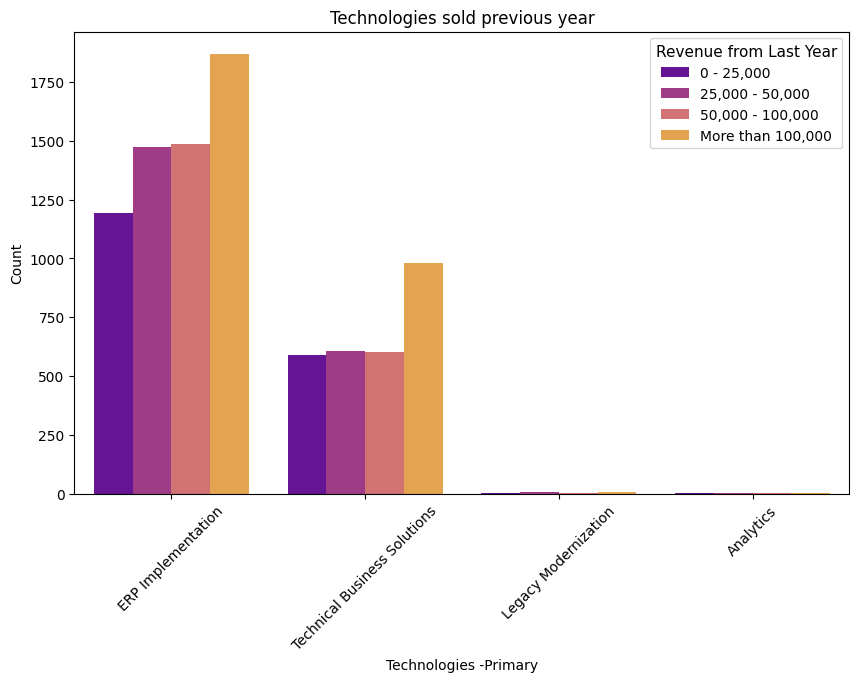

In [145]:
# Define the order of revenue categories
revenue_order = ["0 - 25,000", "25,000 - 50,000", "50,000 - 100,000", "More than 100,000"]

# Filter out rows where 'Business from Client Last Year' is not equal to 'No Business'
filtered_df = df[df['Business from Client Last Year'] != '0 (No business)']

# Create the count plot with specified order
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Technology\nPrimary', hue='Business from Client Last Year', palette='plasma', order=df['Technology\nPrimary'].unique(), hue_order=revenue_order)

plt.title('Technologies sold previous year')
plt.xlabel('Technologies -Primary')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Revenue from Last Year', title_fontsize='11', loc='upper right')
plt.show()


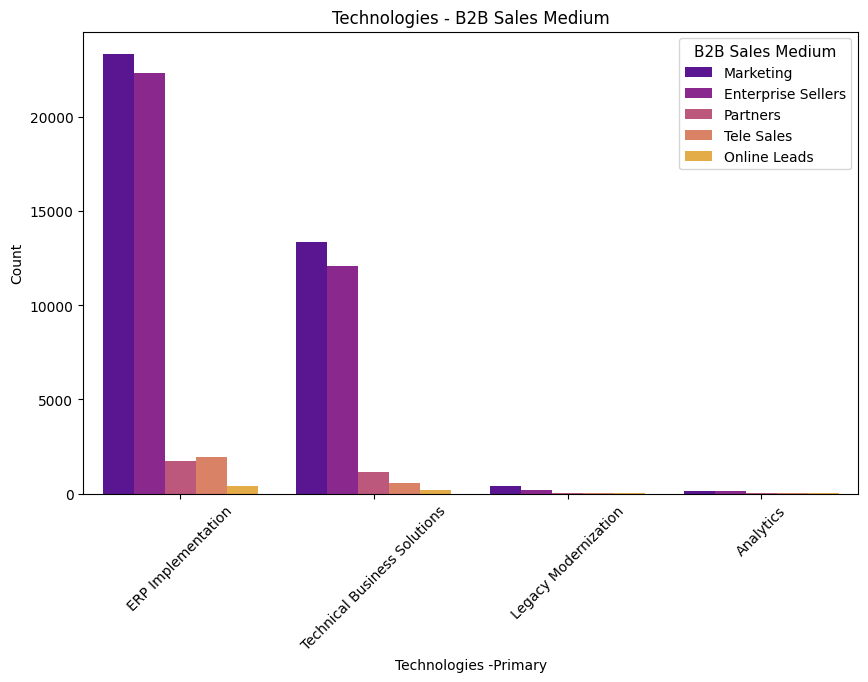

In [146]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Technology\nPrimary', hue='B2B Sales Medium', palette='plasma')
plt.title('Technologies - B2B Sales Medium')
plt.xlabel('Technologies -Primary')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='B2B Sales Medium', title_fontsize='11', loc='upper right')
plt.show()


<Figure size 1000x600 with 0 Axes>

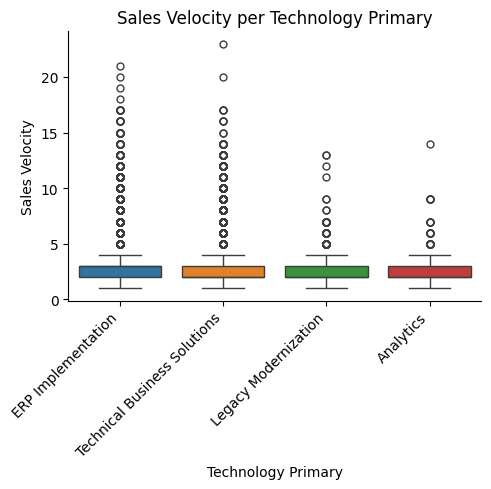

In [147]:
# Assuming 'Sales Velocity' is the column name
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x='Technology\nPrimary', y='Sales Stage Iterations', hue='Technology\nPrimary', kind='box')
plt.xlabel('Technology Primary')
plt.ylabel('Sales Velocity')
plt.title('Sales Velocity per Technology Primary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();


#### Insights from Technology Visualisation
* ERP and Technical Business Solutions are the highest sold/Pitched
* The top 4 cities with the business requirements are Bangalore, Delhi, Mumbai and Hyderabad
* The sales velocity for ERP and Technical business solutions are higher than the rest, this could also be due to the demamd of the services.
* Most of the leads come from Marketing and Enterprise sellers
* The oppurtunity for ERP and Technical business solutions are also higher

#### City Multivariate Analysis

In [148]:
#Business Opputunities by city (Percentage)
total_opportunity_size = df['Opportunity Size (USD)'].sum()
sum_oppurtunity_per_city = df.groupby('City')['Opportunity Size (USD)'].sum()
percentage_opportunity_per_city = round((sum_oppurtunity_per_city / total_opportunity_size) * 100,2)
percentage_opportunity_per_city

City
Bengaluru    12.69
Chennai       9.14
Delhi        19.98
Hyderabad    11.79
Kolkata      10.01
Mumbai       25.53
Pune         10.86
Name: Opportunity Size (USD), dtype: float64

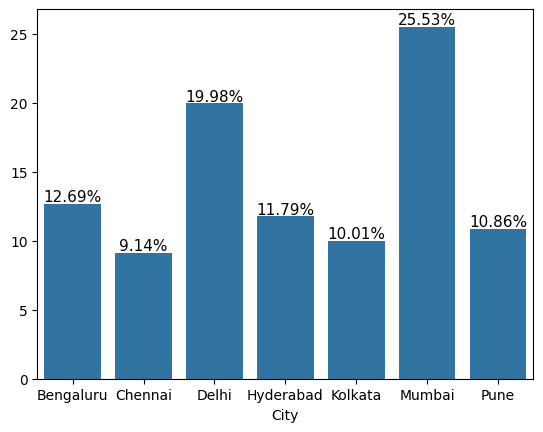

In [149]:
# Plotting the barplot
ax = sns.barplot(x=percentage_opportunity_per_city.index, y=percentage_opportunity_per_city.values)

# Adding percentages on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [150]:
#Most frequent b2b channels where the leads are coming 
most_frequent_medium_per_city = df.groupby('City')['B2B Sales Medium'].apply(lambda x: x.value_counts().idxmax()).reset_index(name='Most Frequent Medium')
most_frequent_medium_per_city

,City,Most Frequent Medium
0,Bengaluru,Marketing
1,Chennai,Enterprise Sellers
2,Delhi,Marketing
3,Hyderabad,Marketing
4,Kolkata,Marketing
5,Mumbai,Marketing
6,Pune,Marketing


In [151]:
#Average Sales velocity per city
sales_velocity_per_city = df.groupby('City')['Sales Velocity'].mean().reset_index()
sales_velocity_per_city

,City,Sales Velocity
0,Bengaluru,43.389028
1,Chennai,43.733351
2,Delhi,45.472527
3,Hyderabad,43.441724
4,Kolkata,42.475673
5,Mumbai,44.580685
6,Pune,38.866675


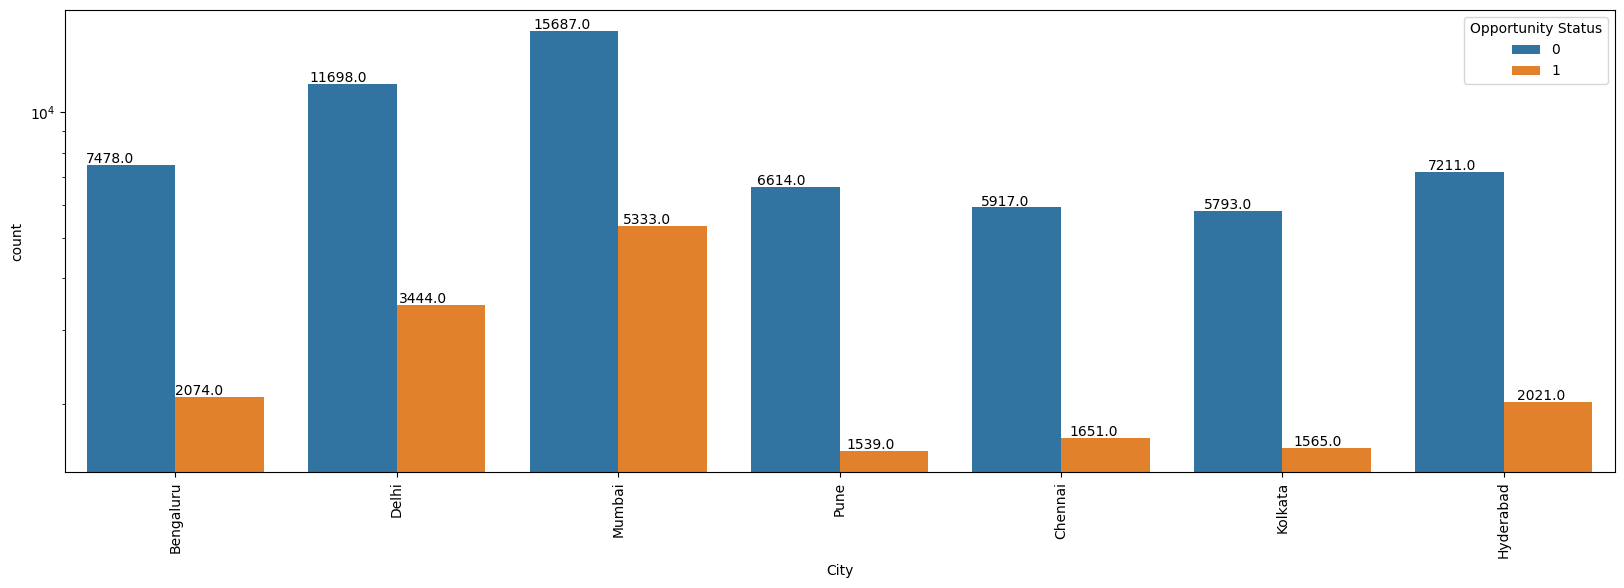

In [152]:
#Leads conversion status based on city
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "City", hue = "Opportunity Status", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

#### Insights from City data
* Except Chennai, most of the leads are coming through Marketing
* Overall, we have lost more than won, there is scope of improvement in this area
* Highest conversion from the leads are seen in Mumbai

#### B2B Sales Medium

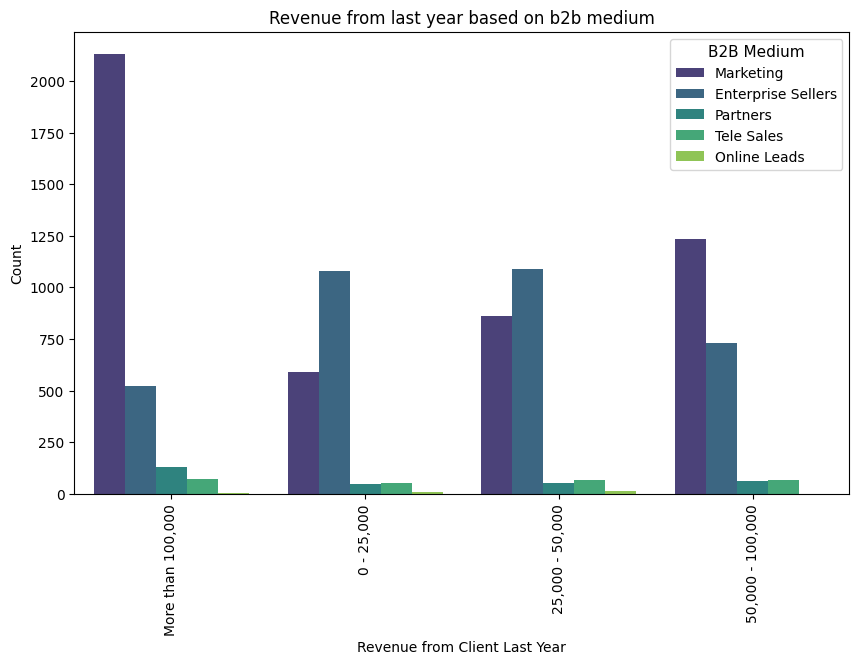

In [153]:
# Filter out rows where 'Business from Client Last Year' is not equal to 'No Business'
filtered_df = df[df['Business from Client Last Year'] != '0 (No business)']

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, hue='B2B Sales Medium', x='Business from Client Last Year', palette='viridis')
plt.title('Revenue from last year based on b2b medium')
plt.xlabel('Revenue from Client Last Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='B2B Medium', title_fontsize='11', loc='upper right')
plt.show()

#### Insights from B2B Sales
* In most segments, the highest revenue from last year was attributed to Marketing activities.
* Enterprise sellers also contributed significantly in the previous year

In [154]:
df_model = df[['Technology\nPrimary','City','B2B Sales Medium','Client Revenue Sizing','Client Employee Sizing','Business from Client Last Year','Opportunity Sizing','Compete Intel','Sales Velocity','Opportunity Status','Sales Stage Iterations','Opportunity Size (USD)']]

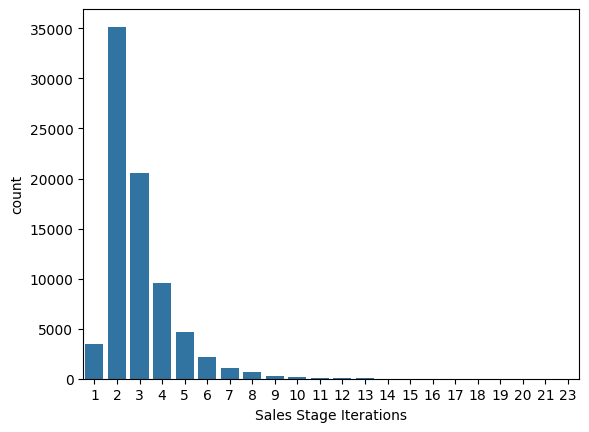

In [155]:
sns.countplot(data =df_model, x ='Sales Stage Iterations');

In [156]:
df_model['Sales Stage Iterations'].describe()

count    78025.000000
mean         2.955732
std          1.497242
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         23.000000
Name: Sales Stage Iterations, dtype: float64

In [157]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Technology
Primary              78025 non-null  object
 1   City                            78025 non-null  object
 2   B2B Sales Medium                78025 non-null  object
 3   Client Revenue Sizing           78025 non-null  object
 4   Client Employee Sizing          78025 non-null  object
 5   Business from Client Last Year  78025 non-null  object
 6   Opportunity Sizing              78025 non-null  object
 7   Compete Intel                   78025 non-null  object
 8   Sales Velocity                  78025 non-null  int64 
 9   Opportunity Status              78025 non-null  int64 
 10  Sales Stage Iterations          78025 non-null  int64 
 11  Opportunity Size (USD)          78025 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 7.1+ MB


In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df_model is your DataFrame
# Encode categorical variables using one-hot encoding
X = pd.get_dummies(df_model.drop(columns=['Opportunity Status']))

# Target variable
y = df_model['Opportunity Status']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation for RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("RandomForestClassifier Accuracy:", accuracy_rf)




RandomForestClassifier Accuracy: 0.8421659724447292


In [159]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for RandomForestClassifier
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("RandomForestClassifier Precision:", precision_rf)
print("RandomForestClassifier Recall:", recall_rf)
print("RandomForestClassifier F1-score:", f1_rf)



RandomForestClassifier Precision: 0.7040448538245895
RandomForestClassifier Recall: 0.504882251579552
RandomForestClassifier F1-score: 0.5880582037129954


In [160]:
importances = model_rf.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features contributing to predicting opportunity status
print("Top Features Contributing to Predicting Opportunity Status:")
print(feature_importance_df.head(10))


Top Features Contributing to Predicting Opportunity Status:
                                            Feature  Importance
0                                    Sales Velocity    0.255901
2                            Opportunity Size (USD)    0.244067
1                            Sales Stage Iterations    0.117232
29   Business from Client Last Year_0 (No business)    0.074481
30        Business from Client Last Year_0 - 25,000    0.022762
31   Business from Client Last Year_25,000 - 50,000    0.019188
34                   Opportunity Sizing_10K or less    0.014345
14              B2B Sales Medium_Enterprise Sellers    0.013648
12                                      City_Mumbai    0.012125
32  Business from Client Last Year_50,000 - 100,000    0.011411


## Insights from the Model

* <span style="color:orange">**A Higher sales Velocity might lead to higher conversion rate**</span>
   - We see that we lost more leads than won, we can try to analyse the sales pitch and add more compelling case studies. We could also include limited time offers for first time customers which could help increase sales velocity
   
* <span style="color:orange">**Larger Oppurtunity Size can contribute to higher revenues**</span>
  - This can be achieved by personalising solutions for these client during the pitch itself by giving them the overview on how we can bring value to the customers

* <span style="color:orange">**Sales stage iterations impacts the conversion rate negatively**</span>
  - There's a high chance that the customers might look outside for a better price so it would be important to have them convert as soon as possible. 

* <span style="color:orange">**Retaining Client from last year are a low hanging fruit**</span>
  - We can reach out with an offer or share our new technologies that might be useful to them, since we have already established our trust with this section of customers, the higher the chance of convertion. 
  
* <span style="color:orange">**Opportunity Sizing can impact the resource allocation**</span>
  - Lower the opportunity size, lesser resource can be allocated so the team can focus on the other major clients/aspects
  - We know that we lose more leads on the ERP and Technical business solution, we can do a competitor analysis to understand the price points of our competitors or try to analyse why the customers didnt choose us and working on that can have a significant impact on the overall revenue since the demand for these services are quite high

* <span style="color:orange">**City_Mumbai**</span>  
  - Leveraging the Lucrative Market Opportunity: Mumbai, being a vibrant and progressive market, presents significant potential for business growth and in the past has also had an increased number of leads. The data highlights that marketing strategies have shown promising results in acquiring new leads in this city. To capitalize on this opportunity, TechnoServe can strategically increase marketing investments and refine targeting strategies to further boost lead generation.

* <span style="color:orange">**Technical Business solutions and ERP**</span> 
  - We see that these two are the most sold service, there's an opputunity to bundle them with other services in order to promote them as well. Aside from that more case studies can be created for the other services that do not sell well in order to promote them.

